In [2]:
import numpy as np
import pandas as pd

In [17]:
# df = pd.read_csv(r'C:\Users\TheLorry\Documents\Python Scripts\selenium dataset\result\resultcombined.csv')
df = pd.read_csv(r'C:\Users\TheLorry\Documents\combinedethan.csv')

df.drop_duplicates(subset ="item_name", keep = "first", inplace=True)
df.head()
df['assumed_category'] = df['assumed_category'].str.strip()
# shuffle everything up
df = df.sample(frac=1).reset_index(drop=True)
top_category_list = df['assumed_category'].value_counts()
top_category_list

Other          3836
Furniture      1005
Electronics     915
Bedding         295
Name: assumed_category, dtype: int64

In [4]:
df = pd.read_csv(r'C:\Users\TheLorry\Documents\Python Scripts\selenium dataset\result\moreresult1.csv')
df['item_category'].value_counts()

 Furniture                            39
 Smart Televisions                    20
 Lawn & Garden                         9
 Home Décor                            9
 Baby Safety                           9
 Small Cooling & Air Treatment         8
 Pet Accessories                       8
 Automotive                            6
 Pet Food                              6
 Cooktops & Ranges                     6
 Small Household Appliances            5
 Outdoor Recreation                    5
 Medical Supplies                      4
 Storage & Organisation                4
 Nursery                               4
 Exercise & Fitness Equipment          3
 Clothes Dryers                        3
 Travel                                3
 Digital Televisions                   2
 Lighting                              2
 Build-in Oven                         2
 Hand Tools                            2
 Cleaning Supplies                     2
 Small Kitchen Appliances              2
 Home Audio     

In [9]:
# xyah?
df['item_category'] = df['item_category'].str.strip()
df['assumed_category'] = df['assumed_category'].str.strip()
top_category_list = df['assumed_category'].value_counts()
# top_category_list = df['item_category'].value_counts()[:14]
top_category_list
# more data 200+

Automotive                      1431
Furniture                       1005
Electronics                      915
Kitchenware                      428
Bedding                          295
                                ... 
Boy's Clothing                     1
Adult Diapers & Incontinence       1
ethan_category                     1
Pet Healthcare                     1
Optics                             1
Name: assumed_category, Length: 85, dtype: int64

In [19]:
# item = df[((df.item_category =='Automative')|
#          (df.item_category =='Furniture')|
#          (df.item_category =='Storage & Organisation')|
#          (df.item_category =='Air Conditioners')|
#          (df.item_category =='Exercise & Fitness Equipment')|
#          (df.item_category =='Laundry Tools & Accessories')|
#          (df.item_category =='Refrigerators')|
#          (df.item_category =='Travel')|
#          (df.item_category =='Home Décor')|
#          (df.item_category =='Musical Instruments')|
#          (df.item_category =='Small Cooling & Air Treatment')|
#          (df.item_category =='Washing Machines'))].sort_values(by='item_category')
# item = item.reset_index(drop=True)

sampled_items = pd.DataFrame()
for index,value in top_category_list.iteritems():
#  print(index)
    item = df[((df.assumed_category == index))].head(295)
    sampled_items = sampled_items.append(item)
sampled_items['assumed_category'].value_counts()

# add stopwords + lemetization (pre-process)
# more sample size
# diff model for comparison purposes 

Other          295
Furniture      295
Bedding        295
Electronics    295
Name: assumed_category, dtype: int64

In [20]:
sampled_items[1:10]

,item_name,item_category,assumed_category
2,[FREE SHIPPING] Nutriedge All Life Stages Cat ...,Pet Food,Other
3,NaVa 3 Layers With Drawer Folding Storage Box ...,Storage & Organisation,Other
4,AG Car Window Door Visor Wind Deflector (Made ...,Automotive,Other
5,Home Gym Fitness Workout Chin Up And Pull Up A...,Exercise & Fitness Equipment,Other
6,Okura Stainless Steel Towel Rack With Wheels F...,Kitchenware,Other
7,Honda Jazz 2014 ABS High Quality Anti Non Slip...,Automotive,Other
10,Perodua Alza (2009 - 2012) Fender Inner Protec...,Automotive,Other
12,HONDA CRZ 1.5: SIMOTA AERO FORM II Carbon Fibe...,Automotive,Other
13,SellinCost Weight Lifting Belt Waist Belt Dip ...,Exercise & Fitness Equipment,Other


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x = sampled_items['item_name']
y = sampled_items['assumed_category']

In [38]:
class_label = sampled_items.assumed_category.unique()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,shuffle=True, stratify = sampled_items.assumed_category )

In [40]:
y_train.value_counts()

Other          198
Furniture      198
Bedding        197
Electronics    197
Name: assumed_category, dtype: int64

In [33]:
# oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)
X_res.value_counts()

ValueError: could not convert string to float: 'Bedside Height Adjustable Computer Table / Laptop Table Bedside Reading Table'

In [41]:
y_res.value_counts()

NameError: name 'y_res' is not defined

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
count_vect = CountVectorizer()

In [44]:
# count_vect.fit(X_train)
# x_train_counts = count_vect.transform(X_train)
x_train_counts = count_vect.fit_transform(X_train)

In [45]:
x_train_counts

<790x2687 sparse matrix of type '<class 'numpy.int64'>'
	with 9633 stored elements in Compressed Sparse Row format>

In [46]:
X_train.shape

(790,)

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer

In [48]:
tfidf_transformer = TfidfTransformer()

In [49]:
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [50]:
x_train_tfidf.shape

(790, 2687)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
vectorizer = TfidfVectorizer()

In [53]:
x_train_tfidf = vectorizer.fit_transform(X_train)

In [54]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
clf = LinearSVC()
mnmlNB = MultinomialNB()
sgdclf = SGDClassifier()
lgstreg = LogisticRegression()

# more model for comparison

In [55]:
clf.fit(x_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
# text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
# text_clf['clf'] #accessing memory inside the pipeline
# text_mnmlNB = Pipeline([('tfidf',TfidfVectorizer()),('mnmlNB',MultinomialNB())])
# text_lgstreg = Pipeline([('tfidf',TfidfVectorizer()),('lgstreg',LogisticRegression())])
text_sgdclf = Pipeline([('tfidf',TfidfVectorizer()),('sgdclf',SGDClassifier())])

In [58]:
text_sgdclf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

In [59]:
predictions = text_sgdclf.predict(X_test)

In [60]:
y_test

1719      Furniture
22            Other
1587      Furniture
345       Furniture
339           Other
           ...     
1677        Bedding
2538        Bedding
132       Furniture
369           Other
1896    Electronics
Name: assumed_category, Length: 390, dtype: object

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
import matplotlib
import matplotlib.pyplot as plt

In [73]:
print(confusion_matrix(y_test,predictions))

[[89  0  8  1]
 [ 0 89  0  9]
 [ 5  1 88  3]
 [ 2  3  7 85]]


In [74]:
report_dict = classification_report(y_test,predictions,output_dict = True)
report_dict['accuracy'] = accuracy_score(y_test,predictions)

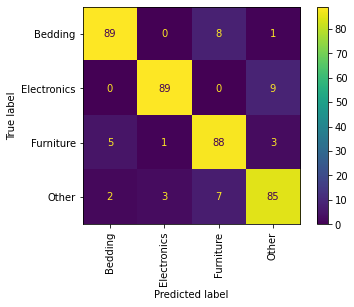

In [63]:
g = plot_confusion_matrix(text_sgdclf, X_test, y_test,xticks_rotation=90)

In [75]:
report_dict['accuracy']
report_dict['weighted avg']['f1-score']
report_dict['weighted avg']['f1-score']

0.9004396699211169

In [76]:
newdf= pd.DataFrame.from_dict(report_dict['weighted avg'], orient='index').T

In [77]:
newdf['model_name']='sdg'
newdf

,precision,recall,f1-score,support,model_name
0,0.901655,0.9,0.90044,390.0,sdg


In [79]:
accuracy_score(y_test,predictions)

0.9

In [78]:
text_sgdclf.predict(["RSS Non slip ALAS KAKI 40x60cm Floor Mat Bedroom Bathroom Door"])

array(['Other'], dtype='<U11')

# saving the model to a file

In [80]:
import pickle
from sklearn.externals import joblib

C:\Users\TheLorry\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [81]:
saved_model = pickle.dumps(text_sgdclf)
saved_model

b'\x80\x03csklearn.pipeline\nPipeline\nq\x00)\x81q\x01}q\x02(X\x05\x00\x00\x00stepsq\x03]q\x04(X\x05\x00\x00\x00tfidfq\x05csklearn.feature_extraction.text\nTfidfVectorizer\nq\x06)\x81q\x07}q\x08(X\x05\x00\x00\x00inputq\tX\x07\x00\x00\x00contentq\nX\x08\x00\x00\x00encodingq\x0bX\x05\x00\x00\x00utf-8q\x0cX\x0c\x00\x00\x00decode_errorq\rX\x06\x00\x00\x00strictq\x0eX\r\x00\x00\x00strip_accentsq\x0fNX\x0c\x00\x00\x00preprocessorq\x10NX\t\x00\x00\x00tokenizerq\x11NX\x08\x00\x00\x00analyzerq\x12X\x04\x00\x00\x00wordq\x13X\t\x00\x00\x00lowercaseq\x14\x88X\r\x00\x00\x00token_patternq\x15X\r\x00\x00\x00(?u)\\b\\w\\w+\\bq\x16X\n\x00\x00\x00stop_wordsq\x17NX\x06\x00\x00\x00max_dfq\x18G?\xf0\x00\x00\x00\x00\x00\x00X\x06\x00\x00\x00min_dfq\x19K\x01X\x0c\x00\x00\x00max_featuresq\x1aNX\x0b\x00\x00\x00ngram_rangeq\x1bK\x01K\x01\x86q\x1cX\n\x00\x00\x00vocabularyq\x1dNX\x06\x00\x00\x00binaryq\x1e\x89X\x05\x00\x00\x00dtypeq\x1fcnumpy\nfloat64\nq X\x06\x00\x00\x00_tfidfq!csklearn.feature_extraction.text\nT

In [82]:
joblib.dump(text_sgdclf, 'sgdclfethan.pkl') 

['sgdclfethan.pkl']

# loading model from file and executing it

In [120]:
clf_from_joblib = joblib.load('sgdclfethan.pkl') 
itemdf = pd.read_csv(r"C:\Users\TheLorry\Desktop\B2Bitems1janto30may.csv")
itemdf = itemdf['item_name']
itemdf.isna().any()
# itemdf = itemdf.dropna()
# itemlist = itemdf['item_name'].tolist()
# itemlist


C:\Users\TheLorry\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (12,19,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


True

In [122]:
itemdf.dropna(inplace=True)
itemdf.isna().sum()

0

In [124]:
itemlist = itemdf.tolist()
itemlist

['【 FREE SHIPPING 】 12box Giraffe - Rack Kids Toy Organizer With 12 Colourful Storage Bins',
 'Crown American Premium Quality Sunflower Seed GuaZi For Birds And Hamster 20kg',
 '100" 100 Inch 100inch 2*1.5m Foldable Projector Screen W/ Tripod Bracket Stand 4:3 2229.1',
 '100" 100 Inch 100inch 2*1.5m Foldable Projector Screen W/ Tripod Bracket Stand 4:3 2229.1',
 'Samsung 50  RU7100 Flat Smart 4K UHD TV Series 7 UA50RU7100KXXM + Free HDMI + Bracket  ( FREE Galaxy Fit E Worth RM 169 )Promotion Till 30th Nov 2019',
 'New : Beko 2 Burner Gas Hob HISW72225SOB (LPG) With Cast Iron Support And Safety Valve',
 'New : Samsung 10kg Top Load Washing Machine With Deep Softener : WA10R5260BG/FQ (Mesin Basuh)',
 'Samsung 43 RU7100 Flat Smart 4K UHD TV Series 7 UA43RU7100KXXM + Free HDMI + Bracket',
 'New : Midea 129L ( Net 99L )Chest Freezer WD-129W ( R600a Refrigerant) Penyejuk Beku',
 'Care Cat Bentonite Cat Litter 10L Lavender X 3',
 'NB North Bayou US60/CA55 32 To 65 Portable TV Trolley Stand Mo

In [127]:
import datetime 
starttime = datetime.datetime.now()
classifiedlist = clf_from_joblib.predict(itemlist)
endtime = datetime.datetime.now()

In [129]:
categorized_item_df = pd.DataFrame(data={"item_name":itemlist,"categorized_item":classifiedlist})
categorized_item_df.to_csv('./itemlistclassifiedlarge.csv')

In [128]:
endtime - starttime

datetime.timedelta(seconds=9, microseconds=826107)